#### Imported important module for completing this software assignment.

In [7]:
import numpy as np
import scipy as sp
import itertools as it
import cv2
import math
from skimage import data
import scipy.linalg
from scipy import ndimage, misc
from scipy import fft
from scipy.fft import dct,idct
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation

# First Part

# Display basis functions of 2-D discrete Fourier Transform

**The Fourier Transform is an important image processing tool which is used to decompose an image into its sine and cosine components.The output of the DFT is a set of numbers that represent amplitudes. The basis functions are a set of sine and cosine waves with unity amplitude.**

Steps that I have followed for completing this part:

**Step-1:** Load the image of interest;

**Step-2:** Get the input image and covert to gray scale;

**Step-3:** Transform the image to improve the speed in the FT calculation Calculate the DFT;

**Step-4:** Output of CV2.dft() function will be 3-D numpy arry, for 2-D Output, 2D DFT as two part complex and real part. so need to convert as we required;

**Step-5**: Reconstruct the image using the inverse Fourier transform;

**Step-6**: Displayling input image, Gray Scale image, DFT of the Input Image;

**Step-7**: Resize my image and then assign it into x and y to get some floating numbers between 0 to 1 by using np.random.random.

**Step-8:** Creating a function to compute basis function and visualize it.

(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

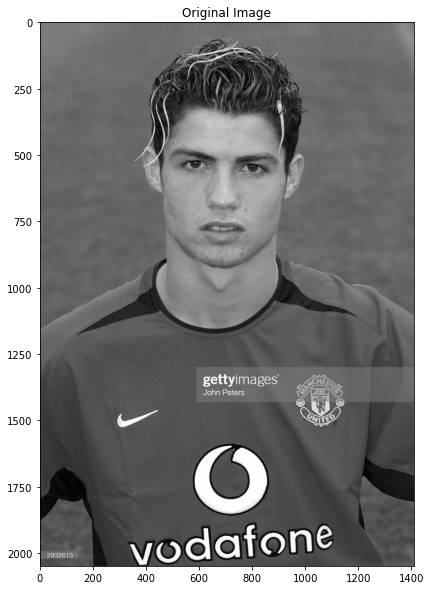

In [87]:
# Transform the image to improve the speed in the fourier transform calculation
img=cv2.imread("ronaldo.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=(8,10))
fig.add_subplot(1,1,1),plt.imshow(img,cmap="gray"),plt.title("Original Image")

In [88]:
rows, cols = img.shape
optimalRows = cv2.getOptimalDFTSize(rows)
optimalCols = cv2.getOptimalDFTSize(cols)
optimalImg = np.zeros((optimalRows, optimalCols))
optimalImg[:rows, :cols] = img

In [89]:
# Calculate the discrete Fourier transform
dft = cv2.dft(np.float32(optimalImg),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [90]:
# output of CV2.dft() function will be 3-D numpy arry, for 2-D Output, 2D DFT as two part complex and real part.
f_complex = dft_shift[:,:,0] + 1j*dft_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)

In [91]:
# Reconstruct the image using the inverse Fourier transform
i_shift = np.fft.ifftshift(dft_shift)
result = cv2.idft(i_shift)
result = cv2.magnitude(result[:, :, 0], result[:, :, 1])

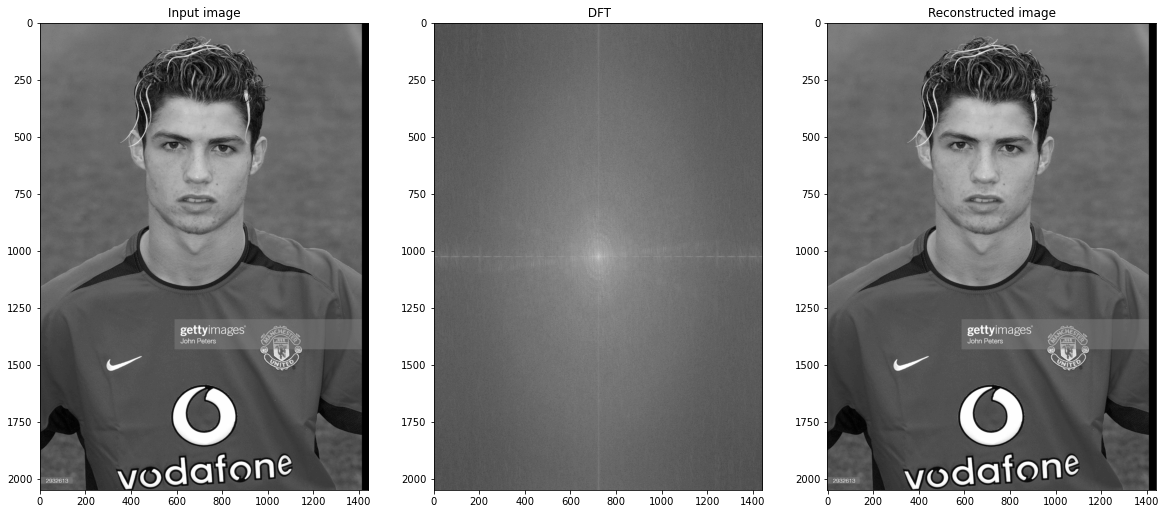

In [92]:
fig=plt.figure(figsize=(20,20))
fig.add_subplot(131),plt.imshow(optimalImg,cmap='gray'),plt.title("Input image")
fig.add_subplot(132), plt.imshow(f_img,cmap="gray"),plt.title(" DFT")
fig.add_subplot(133),plt.imshow(result,cmap="gray"),plt.title("Reconstructed image");

In [125]:
img=np.resize(img,(64,64))

C:\Users\kaisar\AppData\Local\Temp/ipykernel_18612/3172405988.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  base=base.astype(float)


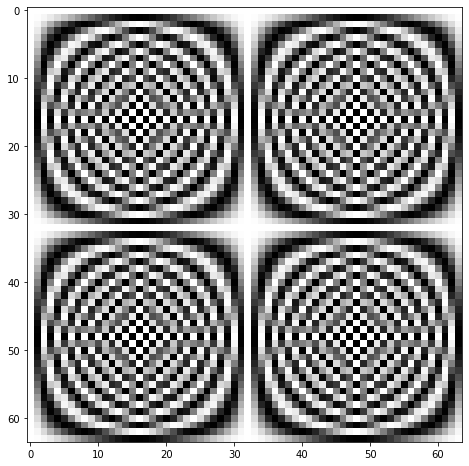

In [126]:
def Basis_Function(X,Y):
    X= np.asarray(x, dtype=float)
    N = X.shape[0]
    
    n = np.arange(N)
    k = n.reshape((N, 1))
    Y = np.asarray(Y, dtype=float)
    M = Y.shape[0]
    m = np.arange(N)
    l = n.reshape((N, 1))
    return np.exp(-2j * np.pi * ((k* n / N)+(l * m/ M)))
x = np.random.random(64)
# x = np.asarray(x, dtype=float)
y = np.random.random(64)
base= Basis_Function(x,y)
base=base.astype(float)
p=np.dot(img,base)

fig=plt.figure(figsize=(8,8))
plt.imshow(base,cmap="gray")

By observin the above figure, we can say that the above figure is the basis image for DFT. 

### For better understanding, we can also give an another example

#### Loading data, we can set data on our own


**"numpy.set_printoptions" set printing options and These below two options determine the way floating point numbers, arrays and other NumPy objects are displayed.**

**Where, precision-Number of digits of precision for floating point output (default 8).**
 
 **suppress-True, means always print floating point numbers using fixed point notation, in which case numbers equal to zero in the current precision will print as zero.**


In [5]:
 np.set_printoptions(precision=4, suppress=True)
 x = np.array(
    [ 0.4967, -0.1383,  0.6477,  1.523 , -0.2342, -0.2341,  1.5792,
      0.7674, -0.4695,  0.5426, -0.4634, -0.4657,  0.242 , -1.9133,
     -1.7249, -0.5623, -1.0128,  0.3142, -0.908 , -1.4123,  1.4656,
     -0.2258,  0.0675, -1.4247, -0.5444,  0.1109, -1.151 ,  0.3757,
     -0.6006, -0.2917, -0.6017,  1.8523])
N = len(x)

#### Let’s say that 𝐂 and 𝐒 as grayscale images. In my case, 𝐂 and 𝐒 are always real matrices. First I built 𝐂 and 𝐒 for my case with 𝑁=32:

In [8]:
C = np.zeros((N, N))
S = np.zeros((N, N))
ns = np.arange(N)
one_cycle = 2 * np.pi * ns / N
for k in range(N):
    t_k = k * one_cycle
    C[k, :] = np.cos(t_k)
    S[k, :] = np.sin(t_k)

#### Displayed the Basis Images

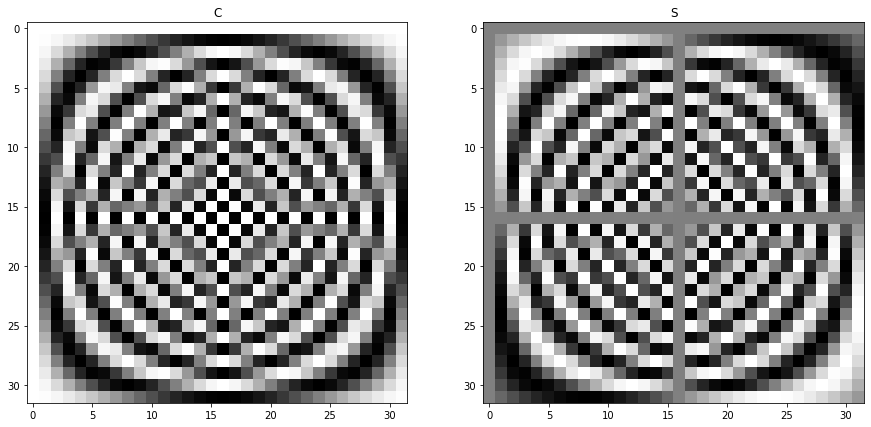

In [12]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(121)
plt.imshow(C,cmap='gray'),plt.title("C")
fig.add_subplot(122)
plt.imshow(S,cmap="gray"),plt.title("S");

### Observations:

#### From the above images we can see that the bottom half of 𝐂 looks like a mirror image of the top half of 𝐂. The bottom half of 𝐒 looks like a sign flipped (black⇔ white) mirror image of the top half of 𝐒. 

#### Then, I have performed the 16 point DFT matrix and try to find out the basis functions of it. And we know that the rows of kernel matrix form a set of basis vectors for an N-dimensional vector space. The primary difference between any two unitary transforms is the choice of basis functions.

**Syntax:** scipy.linalg.dft

**Meaning:** Discrete Fourier transform matrix. Create the matrix that computes the discrete Fourier transform of a sequence.


In [28]:
m = scipy.linalg.dft(16)

#### Validate unitary property, note matrix is unscaled thus 16*np.eye(16). Here, numpy.allclose returns True if two arrays are element-wise equal within a tolerance.

In [29]:
np.allclose(np.abs(np.dot( m.conj().T, m )), 16*np.eye(16))

True

#### For 2D DFT matrix, it's just a issue of tensor product, or specially, Kronecker Product in this case, as we are dealing with matrix algebra. Here, numpy.kron computes the Kronecker product, a composite array made of blocks of the second array scaled by the first.

In [30]:
m2 = np.kron(m, m) # 256x256 matrix, flattened from (16,16,16,16) tensor

#### Now we can give it a tiled visualization, it's done by rearranging each row into a square block

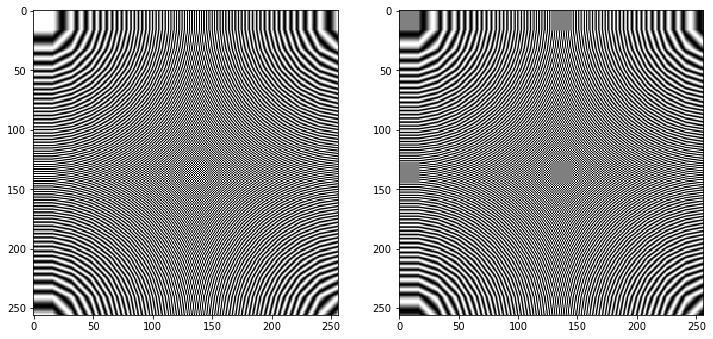

In [32]:
m2tiled = m2.reshape((16,)*4).transpose(0,2,1,3).reshape((256,256))
fig=plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(np.real(m2tiled), cmap='gray', interpolation='nearest')# interpolation='nearest' simply displays an image 
                                                                  #without trying to interpolate between pixels if the 
                                                                  #display resolution is not the same as the image 
                                                                  #resolution
plt.subplot(122)
plt.imshow(np.imag(m2tiled), cmap='gray', interpolation='nearest')
plt.show()

### Observations:

### By obseving the above two figure, we can say that the result (real and imaginary part separately). As we can see they are 2D DFT basis functions.

# Second Part

# Importance of Phase and Amplitude of a 2-D signal.

**By applying Fourier Transform to an image we can get its magnitude as well as phase. The amplitude of an image represents the intensity of the different frequencies in the image. Therefore, it holds the geometrical structure of features in the image that changes in the spatial domain.**

**The phase on the other hand, represents the locations of these features which helps our human eye to better comprehend the image.**

Steps that I have followed here:

**Step-1:** Image of interest was loaded

**Step-2:** Convert the image RGB to GRAY;

**Step-3:** Compute the 2-dimensional discrete Fourier Transform of image

**Step-4:** Shift the zero-frequency component to the center of the spectrum by using numpy.fft.fftshift.

**Step-5:** Extract Magnitude and Phase

**Step-6:** Computes the inverse of the 2-dimensional discrete Fourier Transform.

**Step-7:** Then extract Magnitude and Phase reconstructed Image.
.



In [20]:
## Loading an image
img=data.chelsea()
img=img.astype(np.float32)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_fft=np.fft.fft2(img)
img_shift = np.fft.fftshift(img_fft)

magnitude=abs(img_shift)
magnitude_spec=20*np.log(magnitude)
phase=(np.angle(img_fft))

C:\Users\kaisar\AppData\Local\Temp/ipykernel_11608/251705363.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  phase_nv=phase_nv.astype(np.float32)


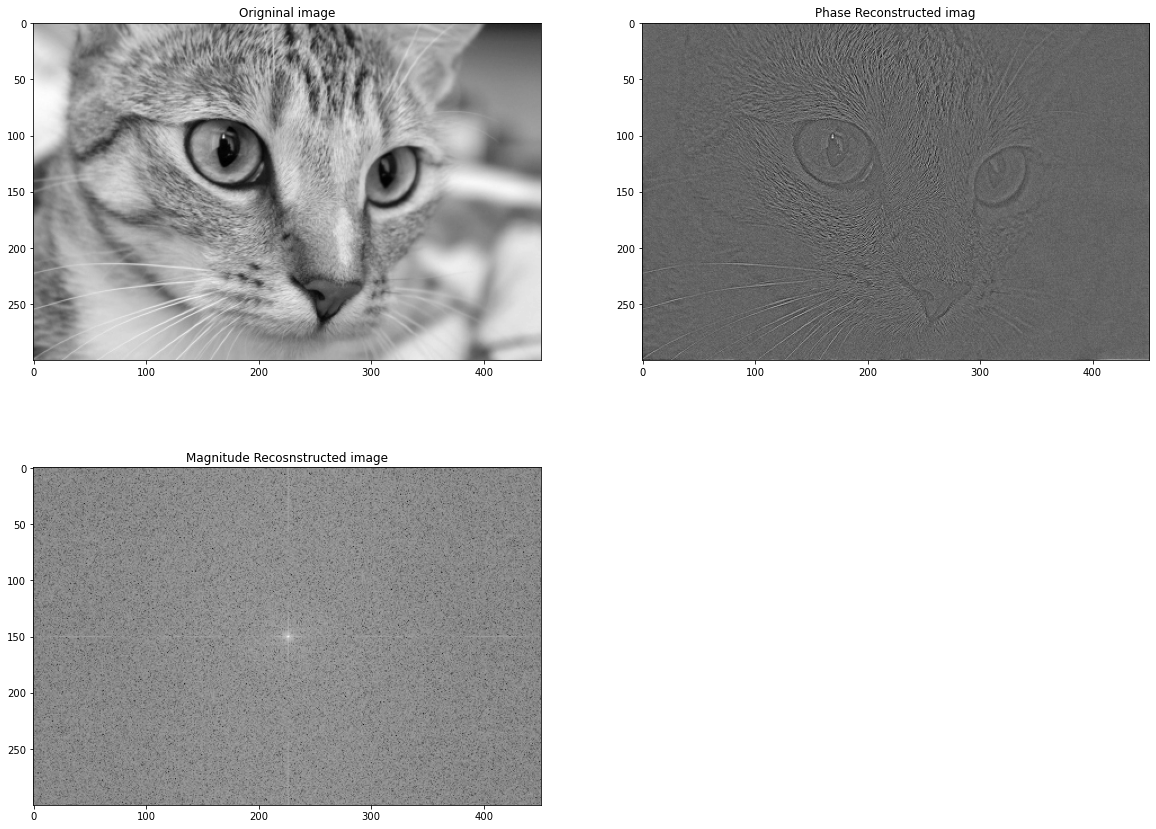

In [21]:
# magnitude_spec=magnitude_spec.astype(np.float32)
magnitude_ishift=np.fft.ifft2(magnitude_spec)
magnitude_inv=abs( np.fft.ifftshift(magnitude_ishift))
magnitude_inv=magnitude_inv.astype(np.float32)

phase_nv=np.fft.ifft2(np.exp(1j*phase))
phase_nv=phase_nv.astype(np.float32)
# p=t.astype(np.float)

fig=plt.figure(figsize=(20,15))
fig.add_subplot(221)
plt.imshow(img,cmap="gray"),plt.title("Origninal image")
fig.add_subplot(222)
plt.imshow(phase_nv,cmap="gray"),plt.title("Phase Reconstructed imag")
fig.add_subplot(223)
plt.imshow(20*np.log(magnitude_inv),cmap="gray"),plt.title("Magnitude Recosnstructed image",);


### Observations:

#### By obseving as we can see at the above figure, when we combine amplitude and phase from the image and perform inverse FFT, the resulting image looks much more like the original from which we took the phase. This means that phase holds more information about the image than amplitude.

# Third Part

# The effect of Gibbs phenomenon on an image

**Gibbs phenomenon is also known as Ringing effect in mathematical methods of image processing is the annoying effect in images appeared as rippling artifact near sharp edges. This effect is caused by distortion or loss of high frequency information in image. For example, Filtering of medical images to remove noise with great care because of the risk of creating artifacts that can led to misdiagnosis. The most common artifact, that which arises from low pass filtering of the image to remove high frequency noise, is the Gibbs Phenomenon, which is manifested by decaying osscillations around high contrast edges.**

**In Fourier Domain filtering, the frequency response of ideal low pass filter is arectengular window that has no transition region between the pass-band and stop-band.In the spatial domain this kind of filtering causes maximal ringing.**

**To reduce this spatial domain artifact, the frequency domain rectengular window is tappered to include a transition region between the pass and stop bands. And the practice of tapering the rectengular window the most common way of reducing the Gibbs Phenomenon.** 

**For this task I am trying to do an FFT-based gaussian blur on a grayscale image, and it works, however it seems introduces Gibbs artifacts.In reality I was using quite a wide gaussian kernel, so I would rather not use direct convolution for the blurring.Here, I have used some syntax from scipy, I have described those below.**

In [3]:
img = misc.ascent()[300:450, 100:250].astype(np.float64)

**Syntax:**
scipy.ndimage.fourier_gaussian(input, sigma)


**Parameters:**
input: input array; sigma:The sigma of the Gaussian kernel.

In [12]:
input_ = np.fft.rfft2(img) #Compute the 2-dimensional FFT.
result = ndimage.fourier_gaussian(input_, sigma=1.5)
result = np.fft.irfft2(result) #Compute the 2-dimensional IFFT

**Syntax:**
scipy.ndimage.gaussian_filter(input, sigma, mode='reflect', truncate=10)

**Parameters:**
input: input array; sigma:The sigma of the Gaussian kernel; The mode parameter determines how the input array is extended when the filter overlaps a border where by using wrap the input is extended by wrapping around to the opposite edge.

In [15]:
v=ndimage.gaussian_filter(img, 1.5, mode='wrap', truncate=10)

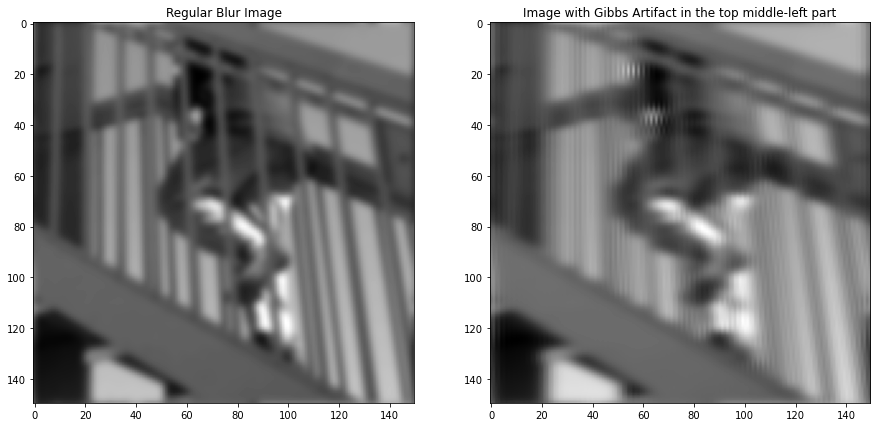

In [17]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(121)
plt.imshow(v,cmap='gray'),plt.title("Regular Blur Image")
fig.add_subplot(122)
plt.imshow(result,cmap="gray"),plt.title("Image with Gibbs Artifact in the top middle-left part");

### Observations:

### By observing the above two figure, we can say that, the left image is a regular blur, the right one is the FFT-based blur. Note that "Gibbs Phenomenon" especially in the top middle-left part of the right image. Also it seems like the blur is a bit stronger on the right for some reason.

# Fourth Part

# The effect of frequency resolution

#### The sample frequency divided by the number of samples gives the frequency resolution (which is also the number of steps in the DFT). For example, if we have a sample rate of 10240 Hz for our 1024 samples, we will have a resolution of 10 Hz.

**We can say another way that, the frequency resolution is defined as Fs/N in FFT. Where Fs is sample frequency, N is number of data points used in the FFT. For example, if the sample frequency is 1000 Hz and the number of data points used by you in FFT is 1000. Then the frequency resolution is equal to 1000 Hz/1000 = 1 Hz.**

**Again, The frequency resolution of FFT (or DFT)  is equal to the inverse of continuous  sampling time (s) :   Freq.res = 1/T, if we are sampling data for 1 second, the resolution is 1Hz. If we are sampling for 10 seconds, the resolution is  0.1Hz. The frequency resolution is independent from the sampling frequency.**

**Basically Fourier transform of a signal is converting a signal one domain (Time domain) to another domain (frequency domain). Same thing with an image, We have an image you convert them into a frequency domain and observed the effect of frequency resolution in that domain.** 

**We can check the effect of the frequency resolution in the image by using the masking and filtering operation via DFT.**

#### I have followed following steps for completing below task for observing the frequency resolution:

**Steps:1** Load an image of interest;

**Steps:2** Output is a 2D complex array. 1st channel real and 2nd imaginary. For fft in opencv input image needs to be converted to float32

**Steps:3** Rearranges a Fourier transform X by shifting the zero-frequency  component to the center of the array. Otherwise it starts at the tope left corenr of the image (array).

**Step:4**  Circular HPF (High Pass Filter) mask, center circle is 0, remaining all ones. Can be used for edge detection because low frequencies at center are blocked and only high frequencies are allowed. Edges are high frequency components. Amplifies noise. (**We can see the effect of Frequency Resolution here**).

**Step:5**  Circular LPF (Low Pass Filter) mask, center circle is 1, remaining all zeros. Only allows low frequency components - smooth regions. Can smooth out noise but blurs edges.(**We can see the effect of Frequency Resolution here**).

**Step:6**  Apply mask and inverse DFT: Multiply fourier transformed image (values) with the mask values.

**Step:7** Get the magnitude spectrum (only for plotting purposes). Get the magnitude spectrum (only for plotting purposes). Inverse DFT to convert back to image domain from the frequency domain Will be complex numbers. Getting the Magnitude spectrum of the image domain



In [65]:
img = cv2.imread('Hand.png') # load an image

(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

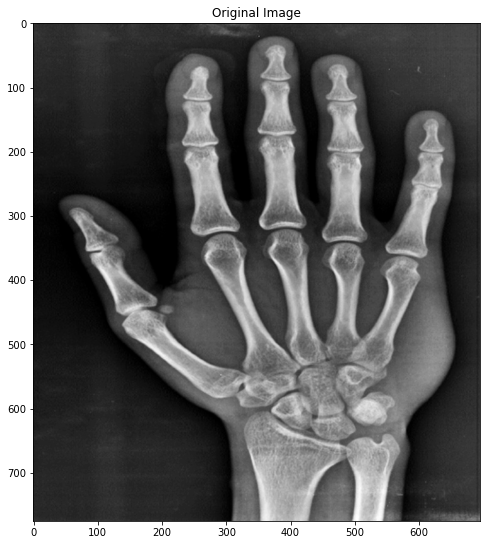

In [66]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=(8,10))
fig.add_subplot(1,1,1),plt.imshow(img,cmap="gray"),plt.title("Original Image")

In [67]:
#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

In [68]:
#Rearranges a Fourier transform X by shifting the zero-frequency 
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

In [69]:
##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [77]:
# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 20
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r ##equation of circle
mask[mask_area] = 0

In [78]:
# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

In [79]:
#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

C:\Users\kaisar\AppData\Local\Temp/ipykernel_7228/4250106004.py:2: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


In [80]:
#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

In [81]:
#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

In [82]:
#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

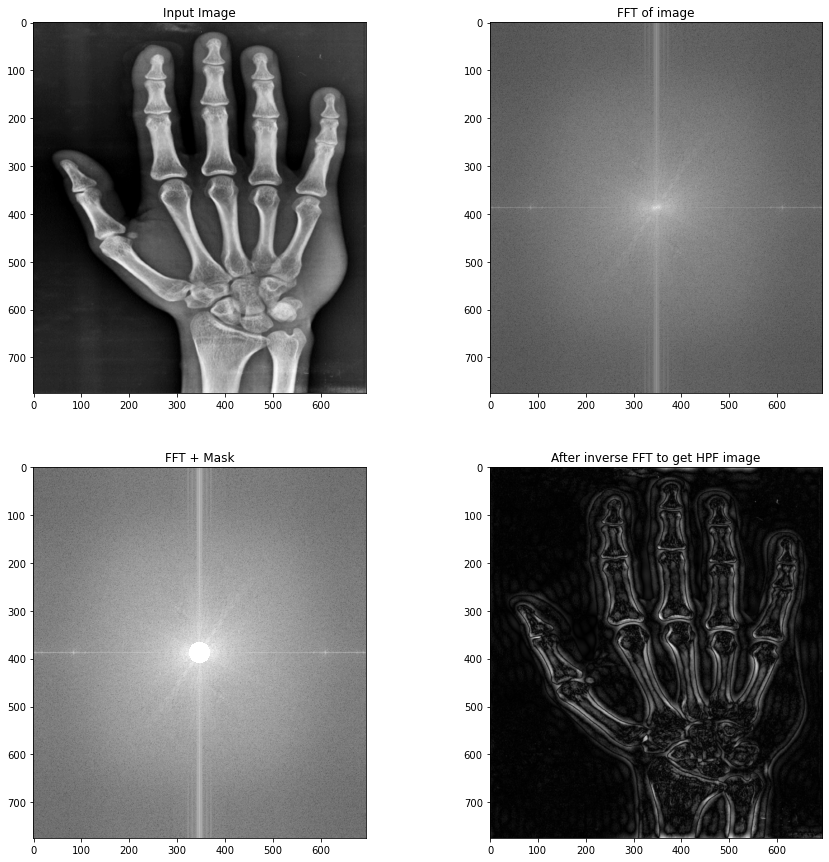

In [83]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT to get HPF image')
plt.show()

### Observations:

### By observing the above figure we can say that the mask of high pass filter should look like the FFT+Mask figure where the central region gone through and all the low frequency components are blocked. The last figure is the sharpened version of the first figure.

## We can do the opposite task for obseving the effect of frequency.

In [52]:
img = cv2.imread('sandstone.tif') # load an image

(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

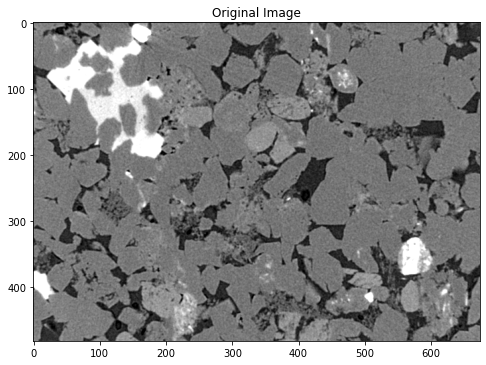

In [53]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=(8,10))
fig.add_subplot(1,1,1),plt.imshow(img,cmap="gray"),plt.title("Original Image")

In [54]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

In [55]:
dft_shift = np.fft.fftshift(dft)

In [56]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [57]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

In [58]:
fshift = dft_shift * mask

In [59]:
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

C:\Users\kaisar\AppData\Local\Temp/ipykernel_7228/199016683.py:1: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


In [60]:
f_ishift = np.fft.ifftshift(fshift)

In [61]:
img_back = cv2.idft(f_ishift)

In [62]:
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

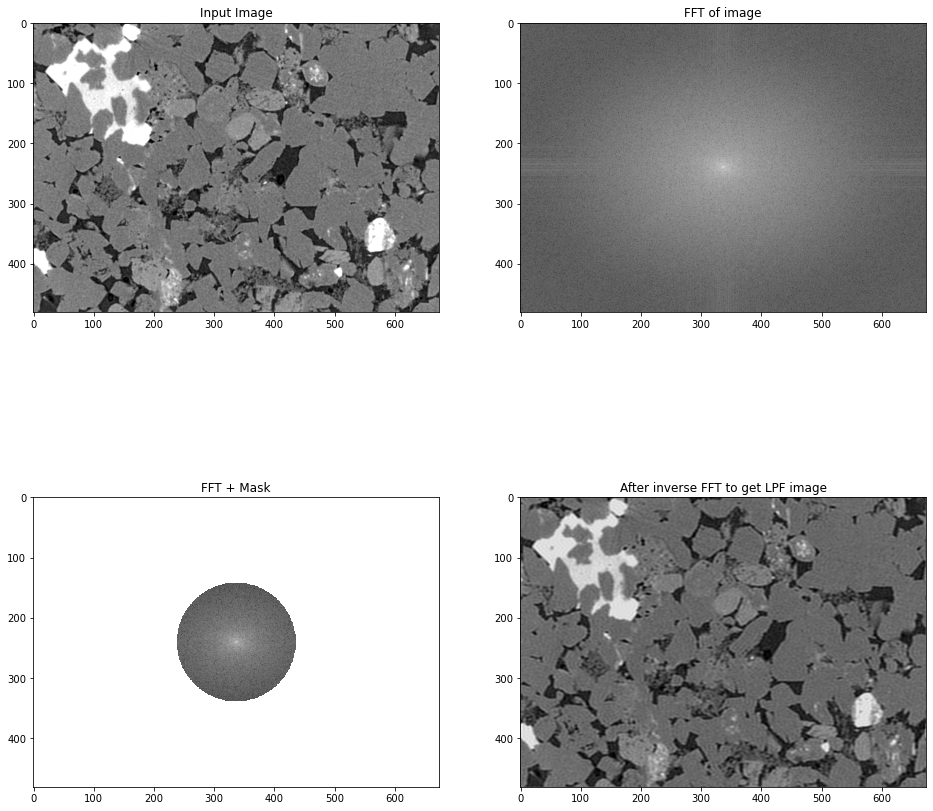

In [64]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT to get LPF image')
plt.show()

### Observations:

### By observing the above figures we can say that the mask of low pass filter should look like the FFT+Mask figure where the central region gone through and all the high frequency components are blocked. The last figure is the smoothed version of the first figure.

# Fifth Part

# The differences between DFT and DCT in compressing signal

## DCT is preferred over DFT in image compression algorithms like JPEG because DCT is a real transformation that results in a single real number per data point. In contrast, a DFT results in a complex number (real and imaginary parts) which requires double the memory for storage.

# Image Compression By Using DCT

In [125]:
img=cv2.imread("Lenna.png")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Coefficient quantization matrix. We can decide this Matrix by ourself on our own choice.


In [126]:
quantization = [[5, 5, 5, 5, 9, 9, 9, 9],
                [5, 5, 5, 5, 5, 9, 9, 9],
                [5, 5, 5, 5, 5, 9, 9, 9],
                [5, 5, 5, 5, 5, 9, 9, 9],
                [5, 5, 5, 5, 5, 9, 9, 9],
                [5, 5, 5, 5, 5, 9, 9, 9],
                [5, 5, 5, 5, 5, 9, 9, 9],
                [5, 5, 5, 7, 7, 9, 9, 9]]

### Steps That I have followed here:

**STEP-1:** Forward DCT (8 × 8)

**STEP-2:** The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.

**STEP-3:** For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

In [127]:
def dct(img):
    img_data = img.astype(float)
    m, n = img_data.shape
    img_dct = np.zeros(img.shape)
    x_batchsize = int(m/8)
    y_batchsize = int(n/8)

    for i in range(0,x_batchsize):
        for j in range(0,y_batchsize):
            window_x_s = i * 8
            window_x = (i+1) * 8
            window_y_s = j * 8
            window_y = (j+1) * 8
            img_dct[window_x_s:window_x, window_y_s:window_y] = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
    return img_dct

In [128]:
def idct(img_dct):
    img_re = np.zeros(img_dct.shape)
    m,n = img_dct.shape
    x_batchsize = int(m/8)
    y_batchsize = int(n/8)
    for i in range(0,x_batchsize):
        for j in range(0,y_batchsize):
            window_x_s = i * 8
            window_x = (i+1) * 8
            window_y_s = j * 8
            window_y = (j+1) * 8
            img_re[window_x_s:window_x,window_y_s:window_y] = cv2.idct(img_dct[window_x_s:window_x, window_y_s:window_y]) * quantization
    return img_re

In [129]:
# DCT
img_dct = dct(img)

# IDCT
img_re = idct(img_dct)

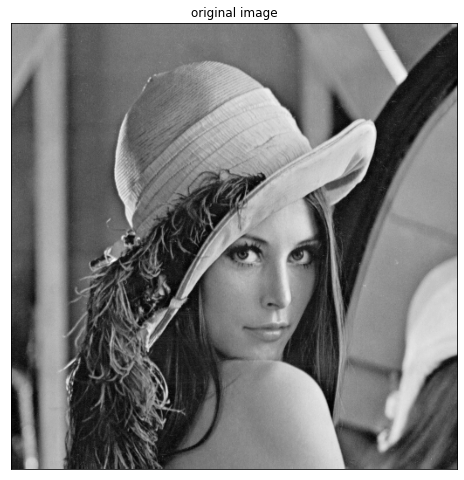

In [130]:
fig=plt.figure(figsize=(8,10))
plt.imshow(img, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]);
print('')

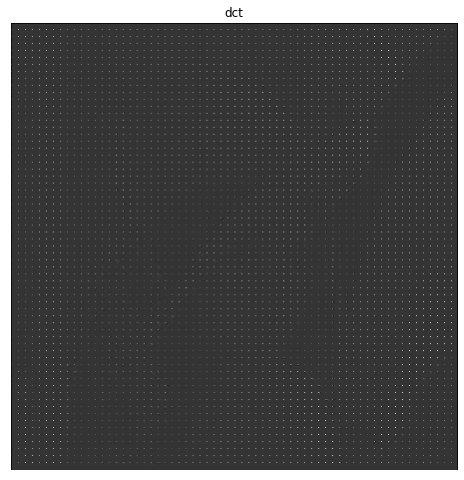

In [131]:
fig=plt.figure(figsize=(8,10))
plt.imshow(img_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([]);

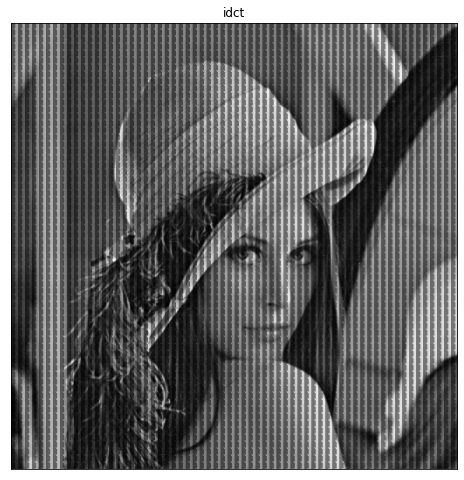

In [133]:
fig=plt.figure(figsize=(8,10))
plt.imshow(img_re, 'gray')
plt.title('idct') #Compression ratio is nearly equal to 1 KB
plt.xticks([]), plt.yticks([])
plt.show();

### Let's try it into the signal,

### Here, I compared the original signal with 100 coefficients and the reconstructed signal with 20 coefficient of DCT and we have observed the results.

I have followed the following steps

**Step:1** to define the signal s having 100 elements;

**Step:2** Reconstruct the signal using only 20 coefficients of DCT that is the reconstructed signal is only one-fifth of the original signal;

**Step:3** calculate the error rate between the original signal yes and the reconstructed signal;

**Step:4**  to visualize the two signals original and the compressed signal by plotting it graphically;


## DCT transform exhibits the property of energy compaction that is for many signals only the first few DCT coefficients have significant Magnitude.

In [83]:
#Define signal s
N=100
t=np.linspace(0,20,N)
s=np.exp(-t/3)*np.cos(2*t)

In [92]:
#20 coefficient-DCT
window=np.zeros(N)
window[:20]=1
y=dct(s, norm="ortho")
yr=idct(y*window,norm='ortho')

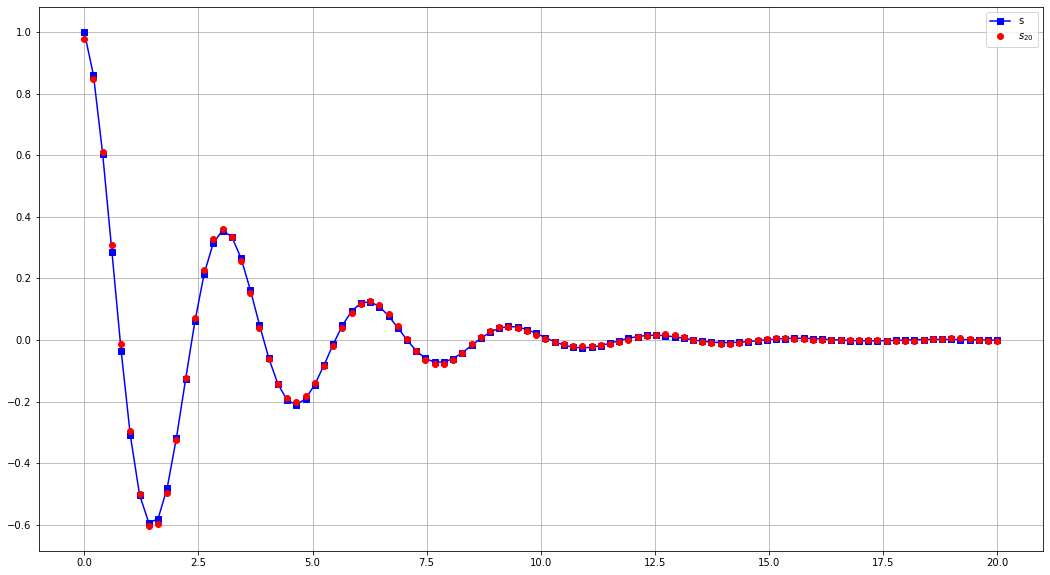

In [93]:
#plot signal and compressed signal
fig=plt.figure(figsize=(18,10))
plt.plot(t,s,"-bs")
plt.plot(t,yr,"ro")
plt.legend(["s","$s_{20}$"])
plt.grid()
plt.show;

### The above graph shows that both the original signal has 100 elementsand reconstructed signal has only 20 cofficient of DCT have the same shape. So, we can tell that reconstructed signal is 5 times compressed than the original signal. 

#### Calculate the Error rate 

In [97]:
e=sum(abs((s-yr)**2))/sum(abs(s**2))
print('Relative error of using 20 coefficients is:',round(e*100,2),'%')

Relative error of using 20 coefficients is: 0.11 %


### But the reconstructed signal is five time compressed than the original signal s. We can say that DCT technique is used for compression technique like videos,audios, images and most famous one is JPEG compression.

# Image Compression by using DFT

#### Compress images and the basic idea that when we perform Fourier Transform in an image most of the Fourier coefficients are quite small and can be truncated or thresholded away so we can zero out all of the small Fourier coefficients retaining only the largest 1% or 2% of those FFT values and then when we perform inverse Fourier transform of that thresholded FFT signal we recover from the original image with relatively low.

In [120]:
img=cv2.imread("ronaldo.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

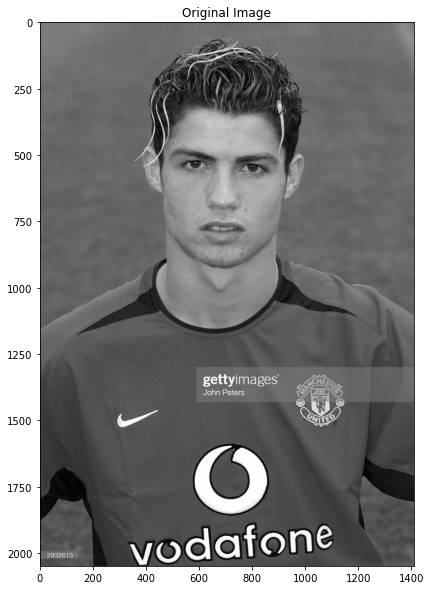

In [121]:
fig=plt.figure(figsize=(8,10))
fig.add_subplot(1,1,1),plt.imshow(img,cmap="gray"),plt.title("Original Image");

### Here, I was  going to take Fourier Transform and literally go to turn this into a  really big vector and sort all of the values from largest to smallest and if we want to keep the top 10% largest values I have just picked the first 10% of that sorted then reshaped FFT and that will determine what the threshold value.

In [122]:
Bt = np.fft.fft2(img)
Btsort = np.sort(np.abs(Bt.reshape(-1)))# Sort by Magnitude

### Here, I was going to take 0.1,0.05, 0.01, and 0.002 means I was going to keep the largest 10% of the Fourier coefficients the largest 5% of the Fourier Coefficients, and the largest 1% of the Fourier coefficients, and finally the largest point two percent of the Fourier coefficients.

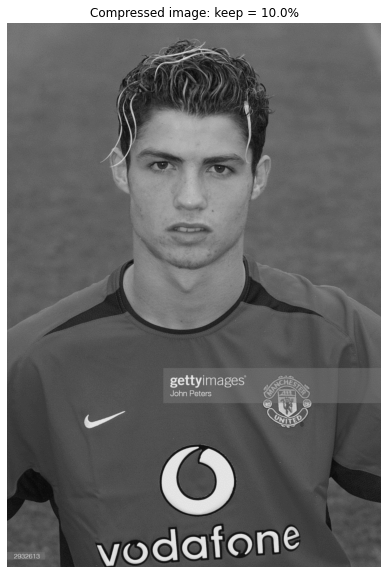

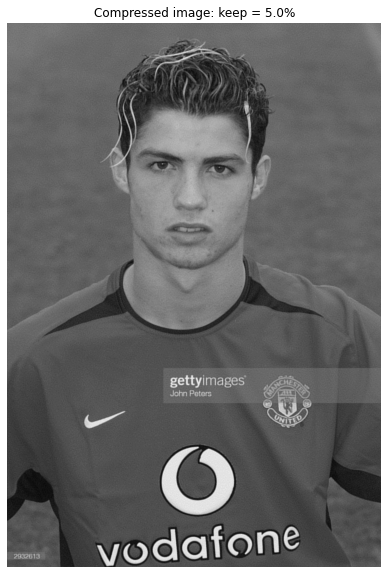

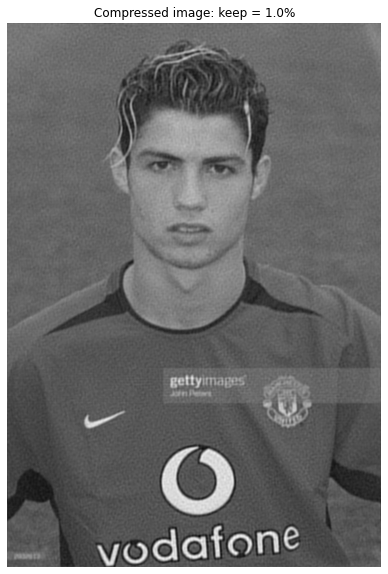

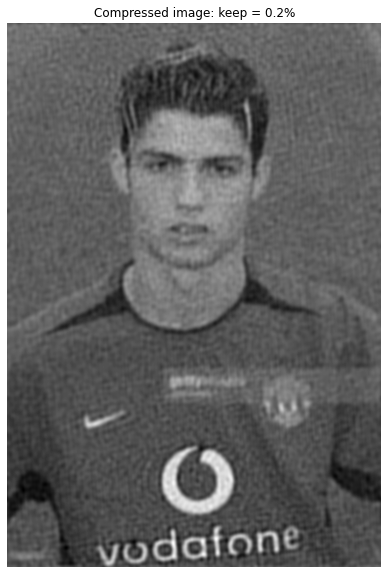

In [123]:
#Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh            #Find small indices
    Atlow = Bt * ind                   #Threshold small indices
    Alow = np.fft.ifft2(Atlow).real    #Compressed Image 
    fig=plt.figure(figsize=(8,10))
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100)+'%');

### Observations:

#### By observing the above images, we can see that the images are gradually compressed.